# 2 퍼셉트론

## 2.1 퍼셉트론이란?
- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 신호 = 흐름을 만들고 정보를 앞으로 전달, 1 = 신호가 흐른다, 0 = 신호가 흐르지 않는다
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력 = 뉴런이 활성화한다고 표현하기도 함
- $\theta$(세타) = 임계값, 정해진 한계
- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여
- $w$(가중치) = 각 신호가결과에 주는 영향력을 조절하는 요소, 가중치가 높을 수록 중요한 신호

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트
- AND 게이트 = 입력이 둘 출력은 하나, 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력
- 진리표 = 입력 신호와 출력 신호의 대응 표

### 2.2.2 NAND 게이트와 OR 게이트
- NAND = Not AND, AND 게이트의 출력을 뒤집은 것처럼 동작, 두 입력이 모두 1일 때만 0 출력, 그 외에는 1 출력
- AND 게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND 게이트가 된다
- OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로
- 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있으나, 퍼셉트론의 구조는 모두 똑같다
- 다른 것은 매개변수(가중치와 임계값)의 값뿐이다, 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정한 것

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2 # 가중치를 곱한 입력의 총 합
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [4]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### 2.3.2 가중치와 편향 도입

In [5]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
print(w*x) # 넘파이 배열끼리의 곱셈은 원소 수가 같아면 각 원소끼리 곱한다
print(np.sum(w*x)) # np.sum() 메서드는 입력한 배열에담긴 모든 원소의 총합을 계산
print(np.sum(w*x) + b) # 이 가중치에 편향을 더하면 계산 완료

[0.  0.5]
0.5
-0.19999999999999996


### 2.3.3 가중치와 편향 구하기

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

- 가중치 = 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- $b$(편향) = 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수
- $b$ 가 -0.1일 경우 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화
- $w$(가중치), $b$(편향) 으로 구별하기도 하지만 모두 가중치라고 하기도 함

In [14]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND 와는 가중치(w 와 b)만 다르다
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2  # AND 와는 가중치(w 와 b)만 다르다
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트
- XOR 게이트 = 배타적 논리합이라는 논리 회로
- XOR 게이트는 직선 하나로 나눌 수 없음

### 2.4.2 선형과 비선형
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다

## 2.5 다층 퍼셉트론이 출동한다면
- 층을 쌓아 다층 퍼셉트론을 만들 수 있다

### 2.5.1 기존 게이트 조합하기
- 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다, 단층 퍼셉트론으로는 비선형 영역을분리할 수 없다
- 각 입력 신호가 NAND 와 OR 게이트의 입력이 되고, NAND 와 OR 의 출력이 AND 게이트의 입력으로 이어진다

### 2.5.2 XOR 게이트 구현하기

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [16]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


- XOR 은 2층 퍼셉트론, 이처럼 층이 여러개인 퍼셉트론을 다층 퍼셉트론이라 한다
- 단층 퍼셉트론으로 표현하지 못한 것을 층을 하나 늘리면 구현 가능

## 2.6 NAND 에서 컴퓨터까지
- 이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다
- 퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고, 이론상 컴퓨터가 수행하는 처리도 모두 표현할 수 있다

## 2.7 정리
- 퍼셉트론은 입출력을 갖춘 알고리즘으로 입력을 주면 정해진 규칙에 따른 값을 출력
- 퍼셉트론에서는 가중치와 편향을 매개변수로 설정
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
- 다층 퍼셉트론은 이론상 컴퓨터를 표현할 수 있다

# 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예
- 입력층, 은닉층, 출력층으로 구성
- 은닉층의 뉴런은 사람의 눈에는 보이지 않는다
- 뉴련이 연결되는 방식은 퍼셉트론과 같ㅌ다

### 3.1.2 퍼셉트론 복습
- $x_1, x_2$ 라는 두 신호를 입력받나 $y$ 를 출력하는 퍼셉트론
    - $y = \begin{cases}0(b+w_1x_1+w_2x_2\leq0) \\ 1(b+w_1x_1+w_2x_2\gt0)\end{cases}$
- 여기서 $b$ 을 명시할 경우 입력이 1인 뉴런이 추가된다, 편향의 입력 신호는 항상 1
- 조건 분기의 동작(0을 넘으면 1, 그렇지 않으면 0을 출력)을 $h(x)$ 라는 하나의 함수로 표현
    - $y = h(b+w_1x_1+w_2x_2)$
    - $h(x) = \begin{cases}0(x\leq0) \\ 1(x\gt0) \end{cases}$
    - 입력 신호의 총합이 $h(x)$ 라는 함수를 거쳐 변환되어, 그 변환된 값이 $y$ 의 출력이 된다

### 3.1.3 활성화 함수의 등장
- $h(x)$ 처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 호라성화 함수라 한다
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할
- 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다
    - $a = b+w_1x_1+w_2x_2$
    - $y = h(a)$
    - 가중치가 달린 입력 신호와 편향의 총합을 계산한 $a$ 를 함수 $h()$ 에 넣어 $y$ 를 출력
- 가중치 신호를 조합한 결과가 $a$ 라는 노드가 되고, 활성화 함수 $h()$ 를 통과하여 $y$ 라는 노드로 변환되는 과정

## 3.2 활성화 함수
- 계단 함수 = 임계값을 경계로 출력이 바뀌는 활성화 함수

### 3.2.1 시그모이드 함수
- 시그모이드 함수를 나타낸 식
    - $h(x) = \frac{1}{1+exp(-x)}$
    - $exp(-x)$ 는 $e^-x$ 를 뜻하며 $e$ 는 자연상수로 2.7182.. 의 값을 ㄱ자는 실수
    - 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0) = 0.731...$, $h(2.0) = 0.880...$ 처럼 특정 값을 출력
- 신경망에서 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴턴에 전달
- 퍼셉트론과 신경망의 주된 차이는 활성화 함수, 그 외 뉴런이 여러 층으로 이어지는 구조와 전달하는 방법은 기본적으로 퍼셉트론과 같다

### 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 인수 x 는 실수(부동소수점)만 받아들인다

In [2]:
def step_function(x):
    y = x> 0
    return y.astype(np.int)

- 넘파이 배열도 지원하도록 수정한 것

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x>0
print(y)

[-1.  1.  2.]
[False  True  True]


- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다
- 배열 x 의 원소 각각이 0보다 크면 True, 0 이하면 False 로 변환한 새로운 배열 y 가 생성된다

In [4]:
y = y.astype(np.int)
print(y)

[0 1 1]


C:\Users\lbw\AppData\Local\Temp\ipykernel_8272\4147947644.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


- 계단 함수는 0이나 1의 int 형을 출력하는 함수기에 배열 y 의 원소를 bool 에서 int 형으로 바꾼다
- astype() 메서드로 배열의 자료형 변환
- bool 을 int 로 변환하면 True 는 1, False 는 0으로 변환

### 3.2.3 계단 함수의 그래프

C:\Users\lbw\AppData\Local\Temp\ipykernel_8272\739440373.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


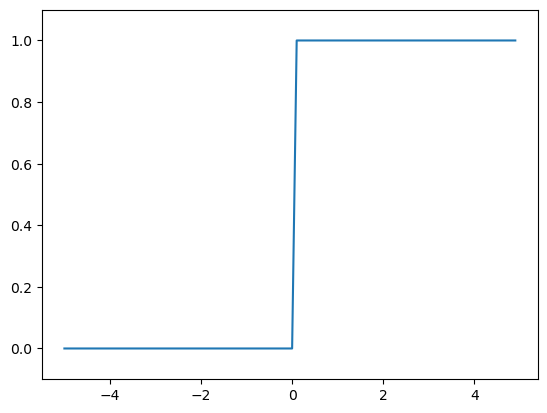

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

- np.arange(-5.0, 5.0, 0.1) 은 -5.0에서 5.0까지 0.1 간격의 넘파이 배열을 생성
- step_function() 은 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수를 실행해, 그 결과를 다시 배열로 만들어 돌려준다
- 그래프처럼 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀐다, 그 형태가 계단 같아서 계단 함수라 불린다

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


- 넘파이 배열이 처리 가능한 이유는 넘파이의 브로드캐스트 때문
- 브로드캐스트 기능 = 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [9]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]
